# Chapter 3 Classification

There are two most common tasks in **supervised machine learning**: **regression** (predicting values) and **classification** (predicting classes). In this chapter, we focuse on building classification systems.

## Data Preparation

We will use the MNIST dataset of handwritten images as an example.

- Load MNIST dataset using sklearn.datasets.fetch_mldata() or from http://yann.lecun.com/exdb/mnist/ with python-mnist package.
- Construct training set and test set. We will use training set to build the classifier, and use test set to evaluate its performance.
- Explore the dataset (find size of dataset, show a random image, show multiple images

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#def sort_by_target(mnist):
#    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
#    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
#    mnist.data[:60000] = mnist.data[reorder_train]
#    mnist.target[:60000] = mnist.target[reorder_train]
#    mnist.data[60000:] = mnist.data[reorder_test + 60000]
#    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [3]:
#try:
#    from sklearn.datasets import fetch_openml
#    mnist = fetch_openml('mnist_784', version=1, cache=True)
#    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
#    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
#except ImportError:
#    from sklearn.datasets import fetch_mldata
#    mnist = fetch_mldata('MNIST original')
#mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [146]:
# Load MNIST from the csv file
cur_path = os.getcwd()
datapath = cur_path
os.listdir(datapath)

['mnist_test.csv', 'mnist_train.csv']

In [147]:
# Load the CSV files
os.chdir(datapath)
train_df = pd.read_csv('mnist_train.csv', sep = ',')
train_df.shape

(59999, 785)

label: 7


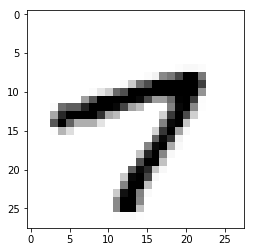

In [148]:
# split the first column and the rest
train_labels = train_df.iloc[:, 0]
train_labels
train_images = train_df.iloc[:, 1:]

# convert the data structure from data frame to numpy array
train_labels = np.array(train_labels)
train_images = np.array(train_images)

# Show the first image
img = train_images[100].reshape(28, 28)
print("label:", train_labels[100])
plt.imshow(img, cmap = mpl.cm.binary)

In [141]:
test_image = pd.read_csv('mnist_test.csv', sep = ',')

In [142]:
test_image.shape
test_image = np.array(test_image)

In [143]:
test_labels = test_image[:, 0]
test_labels[:10]

array([2, 1, 0, 4, 1, 4, 9, 5, 9, 0], dtype=int64)

2


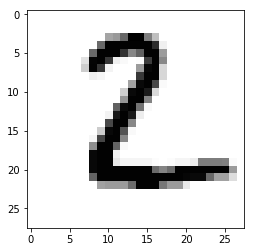

In [144]:
test_images = test_image[:, 1:]
print(test_labels[0])

img = test_images[0].reshape(28, 28)
plt.imshow(img, cmap = "Greys")

In [145]:
# mnist['DESCR']

In [134]:
# images = mnist['data']
# labels = mnist['target']

In [135]:
# images.shape

In [136]:
# some_digit = images[12345]
# some_digit

In [137]:
# train_images = np.array(train_images)
# train_images.shape

In [138]:
# test_images = np.array(test_images)
# train_labels = np.array(train_labels)
# test_labels = np.array(test_labels)

In [139]:
# Use imshow() from matplotlib to show the image
# some_digit = images[123]
# some_digit = some_digit.reshape([28, 28])
# plt.imshow(some_digit,
#           cmap=mpl.cm.binary)

## Split the dataset into training set and test set

We must reserve a portion of the data to test the model. The training set is used to train the model, and usually cannot be used to evaluate the model.

In [156]:
# Since the training set and test set are already split, we no long need 
# train_test_split. However, we need to do shuffling
new_indices = np.random.permutation(range(len(train_images)))
train_images = train_images[new_indices]
train_labels = train_labels[new_indices]

Next, we apply KNeighborsClassifier to build a binary classifier

In [159]:
# VERY SLOW
# Apply KNN model to build the binary classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_images, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [160]:
# VERY SLOW 
# Use the model to make predictions on the test set
predictions_knn = knn.predict(test_images)

In [162]:
# split data into training set and test set, usually we take about 15% as test data
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_jobs = 1)
knn.fit(train_images, train_labels)
# train_images, test_images, train_labels_5, test_labels_5 = train_test_split(images, labels_5, test_size = 0.15)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [164]:
# Create a binary labels for '5' or 'not 5'
train_labels_5 = [(label == 5) for label in train_labels]
test_labels_5 = [(label == 5) for label in test_labels]

# Use SGDClassifier 
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(train_images, train_labels_5)

C:\Users\Muhammad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [165]:
train_images.shape

(59999, 784)

In [166]:
# train_labels_5.shape

In [167]:
# train_labels_5[:100]

In [168]:
predictions = sgd.predict(test_images)
predictions[:10]

array([False, False, False, False, False, False, False, False, False,
       False])

## Build a Binary Clasifier

To start, we aim at building a binary classifier to identify if an handwritten digit is five.

- Create the labels for binary classification (1 for five, and 0 for all other digits)
- Apply the **k-nearest-neighbor algorithm** using sklearn.neighbors.KNeighborsClassifier.
- Use its fit() method to train the model, use predict method to make predictions on given images.

In [169]:
type(labels)

numpy.ndarray

In [170]:
# create an array labels_5 to store the truth value of the label being 5 
labels_5 = (labels == 5)
df_labels = pd.DataFrame(labels, columns = ['Label'])
df_labels['Label'].value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: Label, dtype: int64

In [171]:
df_labels_5 = pd.DataFrame(labels_5, columns = ['Label'])
df_labels_5['Label'].value_counts()

False    63687
True      6313
Name: Label, dtype: int64

In [172]:
# the orginal labels are sorted
labels[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

## Evaluate Performance of a Classifier

- Use sklearn.metrics.accuracy_score to calculate classification accuracy on the training set and on the test set.
- Display the images where the model predicts wrong.
- Use cross-validation to evaluate the performance of the model on various training and test sets.
- Use confusion matrix to show the percentage of **false positives** and **true negatives**.

In [173]:
# Calculate the test accuracy
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(test_labels_5, predictions)
print('test_accuracy:', test_accuracy)

# training accuracy is not a good measure of performance
train_predictions = sgd.predict(train_images)
train_accuracy = accuracy_score(train_labels_5, train_predictions)
print('train_accuracy:', train_accuracy)

test_accuracy: 0.9598959895989599
train_accuracy: 0.9560659344322405


#### Cross Validation
- partition the dataset into k mutully-exclusive subsets
- perform training on all but the 1st set, test the performance on the 1st set.
- perform training on all but the 2nd set, test the performance on the 2nd set.
- perform training on all but the 3rd set, test the performance on the 3rd set.
- ....
- perform training on all but the last set, test the performance on the last set.

In this way, the model is tested on k different training sets. If all performances are acceptable, we should have high confidence on the model.

In [174]:
from sklearn.model_selection import cross_val_score
accuracy_scores = cross_val_score(sgd, train_images, train_labels_5, cv = 5,
                                 scoring = 'accuracy')

C:\Users\Muhammad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Muhammad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Muhammad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to 

In [175]:
print(accuracy_scores)

[0.96433333 0.96416667 0.96641667 0.96783333 0.9571631 ]


### Confusion Matrix
For each pair of class A and B:
- count the number of instances of class A being classified as B
- count the number of instances of class B being classified as A

The numbers will form an $n\times n$ matrix, where $n$ is the number of classes.

In [176]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_labels_5, predictions)
print(conf_mat)

[[9053   54]
 [ 347  545]]


**For binary classifiers**:
confusion matrx = [[TN, FP], [FN, TP]]

- TN: true negative
- FP: false positive
- FN: false negative
- TP: true positive

**Precision** = TP / (TP + FP)

- What does precision represent?
- Can a bad model have high precision?


**Recall** = TP / (TP + FN)
- What does recall represent?
- Can a bad model have high recall?

$F_1$ **score**

$F_1 = \frac{1}{\frac{1}{precision} + \frac{1}{recall}}$

In [177]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(test_labels_5, predictions)
recall = recall_score(test_labels_5, predictions)
f1 = f1_score(test_labels_5, predictions)
f1_formula = 2 / (1 / precision + 1 / recall)
print(precision, recall, f1, f1_formula)

0.9098497495826378 0.6109865470852018 0.7310529845741113 0.7310529845741114


## More Performance Measures

- Precision-Recall tradeoff
- Distribution of scores
- ROC (Receiver operation characteristic) curve: True Positive rate vs. Negative Positive rate
- AUC (Area under curve)

In [178]:
from sklearn.metrics import roc_curve
test_scores = sgd.decision_function(test_images)
tpr, npr, thresholds = roc_curve(test_labels_5, test_scores)

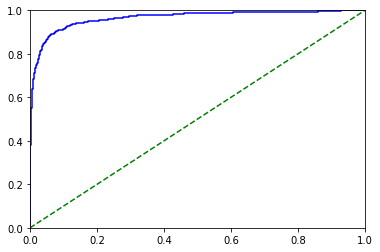

In [179]:
# plot tpr vs npr
plt.plot(tpr, npr, 'b-')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot([0, 1], [0, 1], 'g--')

In [180]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(test_labels_5, test_scores)
print("AUC score:", score)

AUC score: 0.9652770425942495


# Multiclass Classification

- Some models can directly handle multiple classes (Random forest, naive Bayes, neural networks)
- One vs. All: build a binary classifier for each class, compare their prediction scores
- One vs. One: build a binary classifier for each pair of classes, and see which class wins most duels

**Q: How to evaluate a multiclass classifier?**

Further topics:

- multilabel classification
- multioutput classification

In [181]:
sgd2 = SGDClassifier()
sgd2.fit(train_images, train_labels)

C:\Users\Muhammad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [182]:
predictions2 = sgd2.predict(test_images)

In [185]:
accuracy = accuracy_score(test_labels, predictions2)
mat = confusion_matrix(test_labels, predictions2)
print(accuracy)

0.8813881388138813


In [186]:
print(mat)

[[ 969    0    1    2    0    0    4    2    0    2]
 [   0 1120    4    1    0    5    2    1    1    1]
 [  27   19  897   12    3    8   14   10   38    4]
 [   7    2   20  913    0   35    2    6   13   12]
 [   9    6   11    9  758    2   31    3   24  129]
 [  25    9    3   52    0  739   23    1   31    9]
 [  16    3   11    4    1   17  905    0    1    0]
 [  11    8   28   10    3   13    2  871    6   75]
 [  34   34   13   34    6   72   17   11  720   33]
 [  17   12    1   19    8   21    1    4    5  921]]


## Homework

1. Training machine learning models on MNIST data with augmentation:
    - Use scipy.ndimage.interpolation.shift() function to shift each image in the MNIST training dataset in the following ways: 1) 1 pixel up; 2) 1 pixel down; 3) 1 pixel to the left; 4) 1 pixel to the right.
    - Use SGDClassifier to build a binary classifier on the augmented dataset that identifies if the image is **9**.
    - Evaluate the performance of the classifier by showing: 1) test accuracy; 2) confusion matrix; 

2. (extra credits) Chapter 3 Exercise 4: Build a spam classifer.

# Shifting image example

In [187]:
from scipy.ndimage.interpolation import shift

In [188]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval = 0, mode = "constant")
    return shifted_image.reshape([-1])

label:  4


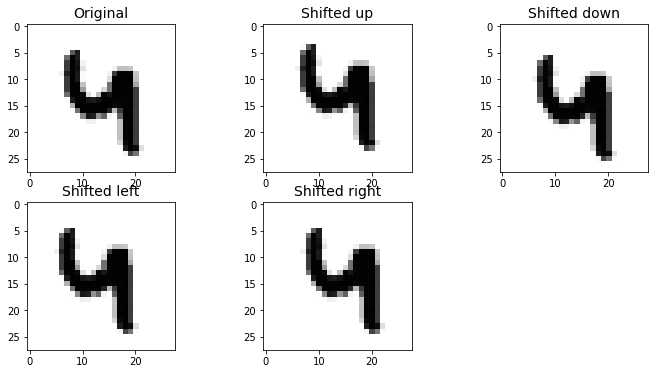

In [189]:
image = train_images[1000]

train_labels = np.array(train_labels)
train_images = np.array(train_images)

shifted_image_up = shift_image(image, 0, -1)
shifted_image_down = shift_image(image, 0, 1)
shifted_image_left = shift_image(image, -1, 0)
shifted_image_right = shift_image(image, 1, 0)

print("label: ", train_labels[1000])

plt.figure(figsize = (12, 6))
plt.subplot(231)
plt.title("Original", fontsize = 14)
plt.imshow(image.reshape(28, 28), interpolation = "nearest", cmap = "Greys")
plt.subplot(232)
plt.title("Shifted up", fontsize = 14)
plt.imshow(shifted_image_up.reshape(28, 28), interpolation = "nearest", cmap = "Greys")
plt.subplot(233)
plt.title("Shifted down", fontsize = 14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation = "nearest", cmap = "Greys")
plt.subplot(234)
plt.title("Shifted left", fontsize = 14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation = "nearest", cmap = "Greys")
plt.subplot(235)
plt.title("Shifted right", fontsize = 14)
plt.imshow(shifted_image_right.reshape(28, 28), interpolation = "nearest", cmap = "Greys")
plt.show()

# Binary classifier for the number 9

In [190]:
type(labels)

numpy.ndarray

In [191]:
labels_9 = (labels == 9)
df_labels = pd.DataFrame(labels, columns = ['Label']) # comment out, may not be necessary if already ran earlier
df_labels['Label'].value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: Label, dtype: int64

In [192]:
df_labels_9 = pd.DataFrame(labels_9, columns = ['Label'])
df_labels_9['Label'].value_counts()

False    63042
True      6958
Name: Label, dtype: int64

In [193]:
# the orginial labels are sorted
labels[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [194]:
# split into training and test sets
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels_9, test_labels_9 = train_test_split(images, labels+9, test_size = 0.15)

In [195]:
train_images.shape

(59500, 784)

In [196]:
train_labels_9.shape

(59500,)

In [197]:
train_labels_9[:100]

array([11, 10, 13, 11, 10,  9, 14, 12, 17, 16,  9, 17, 18, 11, 11, 10, 14,
       16, 12, 12, 14, 13,  9, 11, 14, 12, 17, 10, 15, 12, 10, 10, 16, 12,
       10, 11, 10, 17, 15, 10, 16, 17,  9, 18, 15,  9, 13,  9, 16, 18,  9,
       13, 10, 17, 13, 15, 15, 12, 16, 12, 11, 11, 12, 15, 10, 16, 11, 13,
       11, 12, 18, 16, 15, 12, 11, 12, 13, 17, 11, 16, 17, 12,  9, 13, 18,
       17, 11, 15, 10, 15, 10, 12, 11,  9,  9, 15, 13, 15, 17, 15],
      dtype=int8)

## KNN being used for binary classifier

In [198]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs = 1)
knn.fit(train_images, train_labels_9)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [199]:
predictions_knn = knn.predict(test_images)

In [200]:
# use SGDClassifier
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(train_images, train_labels_9)

C:\Users\Muhammad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [201]:
predictions = sgd.predict(test_images)

In [202]:
# evaluate the performance of the classifier
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(test_labels_9, predictions)
train_predictions = sgd.predict(train_images)
train_accuracy = accuracy_score(train_labels_9, train_predictions)
print(test_accuracy, train_accuracy)

0.8815238095238095 0.8939159663865546


In [203]:
# cross validation
from sklearn.model_selection import cross_val_score
accuracy_scores = cross_val_score(sgd, train_images, train_labels_9, cv = 9, scoring = 'accuracy')

C:\Users\Muhammad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Muhammad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Muhammad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to 

In [204]:
print(accuracy_scores)

[0.87605804 0.85500454 0.86224104 0.86794736 0.86356073 0.86431705
 0.8748676  0.87681598 0.84001816]


In [205]:
# confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_labels_9, predictions)
print(conf_mat)

[[ 942    0    3    2    1    4    4    1    2    2]
 [   2 1127   25   12    3    5    2    5   46    7]
 [  21    2  968   26   10    5    7    7   39    7]
 [   7    1   41  923    1   28    4    9   24   16]
 [   7    1    5    9  846    3    8    8   26   89]
 [  16    1    8   64   13  706   12    3   52   32]
 [  13    6    8    3    8   17  997    1    7    2]
 [   4    1   27   18    6    1    0  969   10   85]
 [  20   11   14   35    8   34    5    8  854   34]
 [  11    1    2   29   21    4    1   44    7  924]]
